In [1]:
# import all the lib
import pickle 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from collections import defaultdict

In [2]:
# read the dataset using pandas
price = pd.read_csv('Car details v3.csv')

Récupération de la maison à laquelle appartient la voiture, afin d'avoir une méilleure visualisation et categorisation des données.

Suppression de la colonne 'torque' car après la vérification des modalités majoritaires on trouve que ces dernieres représentent la jointure de deux differentes varibales (caractèristiques) ce qui peut fausser les résultats. 

In [3]:
#Garder le premier mot de name afin d'avoir la maison de la voiture
price['maison']=[x.split()[0] for x in price['name']]
price.drop('name',axis=1, inplace=True)
#on drop torque
price.drop('torque',axis=1,inplace=True)

On remplace les valeurs manquantes par la moyenne pour les colonnes 'seats', 'mileage', 'engine'

In [4]:
#remplacer les valeurs manquantes par les moyennes de chaque variable
price.seats.fillna(price.seats.mean(), inplace=True)
price.mileage.fillna(price.mileage.mean(), inplace=True)
price.engine.fillna(price.engine.mean(), inplace=True)
price.max_power.fillna(price.max_power.mean(), inplace=True)

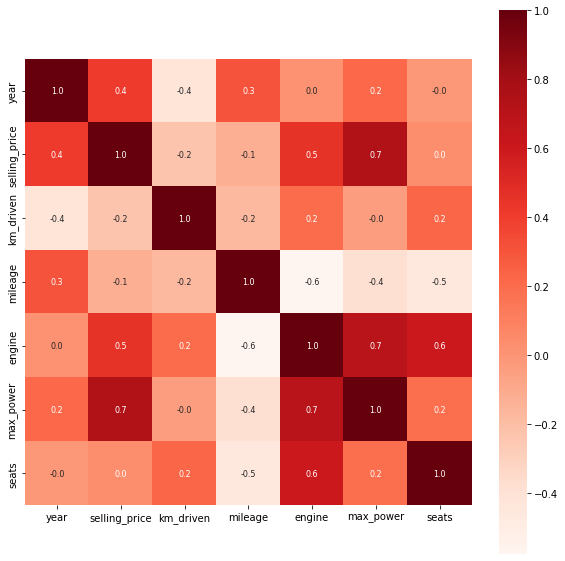

In [5]:
#On calcule les corrélations entre les variables
correlation = price.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Reds")

In [6]:
#ordinal encoding des variables qualitatives
s=(price.dtypes == 'object')
object_cols=list(s[s].index)
object_cols
enc=OrdinalEncoder()
price[object_cols]= enc.fit_transform(price[object_cols])


In [7]:
#centrer réduire le dataset
scaler=StandardScaler()
scaled=scaler.fit_transform(price)

In [8]:
price.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,maison
0,2014,450000,145500,1.0,1.0,1.0,0.0,23.40,1248.0,74.00,5.0,20.0
1,2014,370000,120000,1.0,1.0,1.0,2.0,21.14,1498.0,103.52,5.0,27.0
2,2006,158000,140000,3.0,1.0,1.0,4.0,17.70,1497.0,78.00,5.0,10.0
3,2010,225000,127000,1.0,1.0,1.0,0.0,23.00,1396.0,90.00,5.0,11.0
4,2007,130000,120000,3.0,1.0,1.0,0.0,16.10,1298.0,88.20,5.0,20.0


In [9]:
y = price['selling_price']
X = price.drop(['selling_price','seats','mileage'], axis=1)


In [10]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  engine  \
0     2014     145500   1.0          1.0           1.0    0.0  1248.0   
1     2014     120000   1.0          1.0           1.0    2.0  1498.0   
2     2006     140000   3.0          1.0           1.0    4.0  1497.0   
3     2010     127000   1.0          1.0           1.0    0.0  1396.0   
4     2007     120000   3.0          1.0           1.0    0.0  1298.0   
...    ...        ...   ...          ...           ...    ...     ...   
8123  2013     110000   3.0          1.0           1.0    0.0  1197.0   
8124  2007     119000   1.0          1.0           1.0    1.0  1493.0   
8125  2009     120000   1.0          1.0           1.0    0.0  1248.0   
8126  2013      25000   1.0          1.0           1.0    0.0  1396.0   
8127  2013      25000   1.0          1.0           1.0    0.0  1396.0   

      max_power  maison  
0         74.00    20.0  
1        103.52    27.0  
2         78.00    10.0  
3         90.00    

In [11]:
#diviser les donnée entre data de training et data de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.31, random_state = 3)

In [12]:
# instantiate the random forest regressor

model = RandomForestRegressor(max_depth=10, random_state=0)

# fit the model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [13]:
#prédiction du model quant aux data set
y_pred = model.predict(X_test)

In [14]:
#calcul des métriques relatives au model

mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 20246673324.24468
r square : 0.9689905147580674


In [15]:
input_data = (2014   ,  145500 ,  1.0   ,       1.0  ,         1.0  ,  0.0 , 1248.0 , 74.00   , 20.0  )
input_as_np = np.asarray(input_data)
reshaped_data = input_as_np.reshape(1,-1)
prediction=model.predict(reshaped_data)
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([485521.04146208])

In [16]:
filename= 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))